# PV production prediction

Dataset contains the energy production of a PV plant in Graz, Austria, aswell as weather data from Graz.
Goal is to predict the energy production given weather data as input features. (We just assume here that we have a perfect weather forecast, and want to know how our energy production is going to be.) You are of course free to come up with additional features.

## Modalities
- You have to hand in a runnable, working jupyter notebook (including any additional files that are required to run the notebook).
- The hand in jupyter notebook should include the results of the cells (if you run a jupyter notebook the plots and outputs are saved within it if you click save. There is also a clear button that removes all outputs, please dont do that.)
- If this is done as a group work, groups have to be announced beforehand. It has to be clearly stated who contributed what in the jupyter notebooks or additional files.
- If you use gpt, please include (probably best in another file that you only refer to in your jupyter notebook) your prompt and the response of gpt. If you find problems in gpt responses feel free to document them.
- Please try to be as clear and concise in both code and documentation as possible.

## The dataset

`Nrg` is the meter reading on the PV plant, `diff_Nrg` is the production within this hour.
`diff_Nrg` is the TARGET that we want to predict.
`parameter_metadaten.csv` contains a detailed description of the features and measuments that come from this weatherstation. (sorry its in german, use gpt or other tools to translate).


In [54]:
import pandas
from matplotlib import pyplot as plt


In [55]:
df = pandas.read_csv('readings_pv_prod_and_weather.csv')
df['time'] = pandas.to_datetime(df['time'])
df = df.set_index('time')
df.describe()

,Nrg,diff_Nrg,station,cglo,cglo_flag,ff,p,p_flag,pred,pred_flag,...,rr,rr_flag,rrm,rrm_flag,sh,sh_flag,so_h,so_h_flag,tl,tl_flag
count,8736.000000,8736.000000,8736.0,8736.000000,8736.0,8722.000000,8736.000000,8736.0,0.0,0.0,...,8735.000000,8736.0,8736.000000,8736.0,0.0,0.0,8736.000000,8736.0,8736.000000,8736.0
mean,150603.577126,5.232466,16412.0,153.648352,10.0,1.518986,972.240499,10.0,NaN,NaN,...,0.088746,10.0,3.327953,10.0,NaN,NaN,0.259924,10.0,10.735897,10.0
std,16322.709680,8.501655,0.0,234.852916,0.0,0.967772,7.499712,0.0,NaN,NaN,...,0.946038,0.0,12.062248,0.0,NaN,NaN,0.398908,0.0,8.817026,0.0
min,125840.320310,0.000000,16412.0,0.000000,10.0,0.000000,947.700000,10.0,NaN,NaN,...,0.000000,10.0,0.000000,10.0,NaN,NaN,0.000000,10.0,-9.900000,10.0
25%,134764.875000,0.000000,16412.0,0.000000,10.0,0.900000,968.000000,10.0,NaN,NaN,...,0.000000,10.0,0.000000,10.0,NaN,NaN,0.000000,10.0,3.300000,10.0
50%,151245.734380,0.046880,16412.0,8.000000,10.0,1.300000,972.600000,10.0,NaN,NaN,...,0.000000,10.0,0.000000,10.0,NaN,NaN,0.000000,10.0,10.000000,10.0
75%,167334.328130,7.666020,16412.0,248.000000,10.0,1.900000,976.800000,10.0,NaN,NaN,...,0.000000,10.0,0.000000,10.0,NaN,NaN,0.500000,10.0,17.700000,10.0
max,172037.703130,37.890620,16412.0,1008.000000,10.0,8.200000,992.700000,10.0,NaN,NaN,...,52.600000,10.0,60.000000,10.0,NaN,NaN,1.000000,10.0,34.500000,10.0


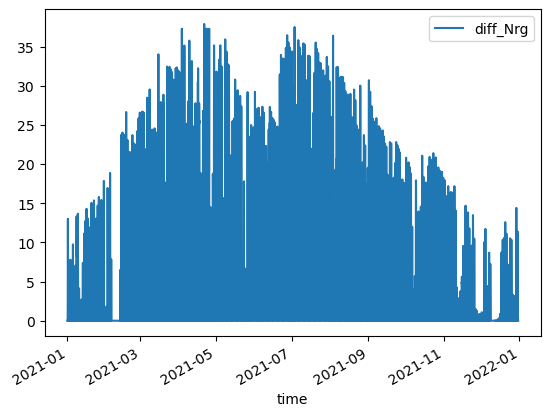

In [56]:
df.plot(y=['diff_Nrg'])
plt.show()

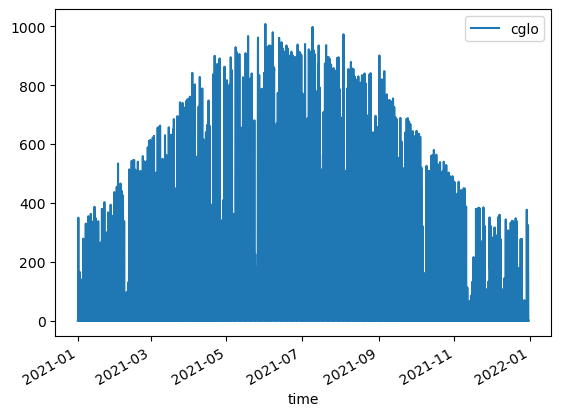

In [57]:
df.head()
df.plot(y=['cglo'])
plt.show()

## Trivial predictor
This is your starting point. This is a very simplistic predictor for energy production based only on a single feature, the global irradiation `cglo`.



In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# select X features and the target y
X = df[['cglo']].to_numpy()
y = df['diff_Nrg'].to_numpy()


# apply scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, shuffle=False)

# train model
rg = RandomForestRegressor()
rg.fit(X_train, y_train)

# predict the test set targets using the model
y_pred = rg.predict(X_test)

# measure performance
print(f'mse: {mean_squared_error(y_test, y_pred)}')
print(f'mae: {mean_absolute_error(y_test, y_pred)}')


mse: 3.8840707882597862
mae: 0.7366937280315643


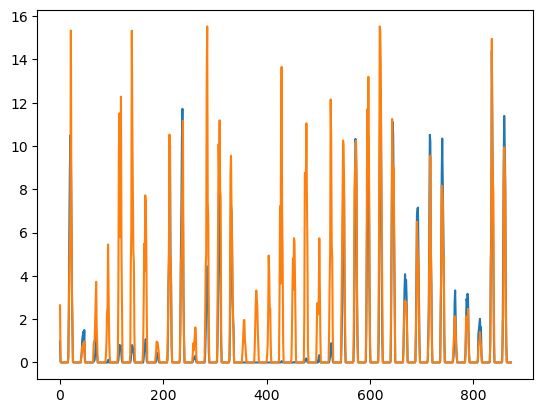

In [59]:
# plot the full test set
plt.plot(y_test)
plt.plot(y_pred)
plt.show()

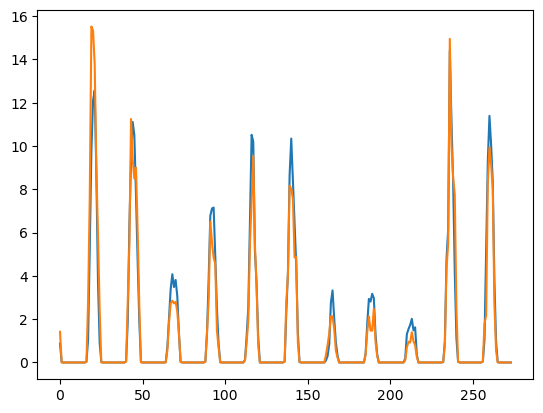

In [60]:
# plot the last few 100 points to see a bit more closer what the days look like
plt.plot(y_test[600:])
plt.plot(y_pred[600:])
plt.show()

## Discussion
Mean Absolute error of 0.74 kW/h doesnt look too bad, also the prediction doesnt look so bad at all!

However... Have a closer look.
1. There is a classic case of information leakage in this model. (google "information leakage")
2. The test set is misleadingly selected to inflate performance. Why and How? (inflates performance about 42%)

# Your tasks
There are some low hanging fruit, some medium difficulty, and some hard tasks
- 3 - identify and fix the problem with the test set (and explain why what i did up there makes it score better)
- 4 - fix the information leakage
- 2 - implement the "trivial baseline"
- 6 - implement cross validation
- 2 - add more metrics
- 2 - add more (useful) visualizations
- 2 - add different machine learning regression models and see how they perform on this task and compare their performance scores.
- 7 - feature engineering (e.g. more features from the weather station, or additional features that you can produce) and their performance comparison.
- 4 - implement a neural network regressor
- 8 - auto regressive application of a model for forecasting, do a forecast for a week

To a total of 40 points.

### Trivial baseline
The trivial baseline model to be implmemented is simply: "predict that the value for the next hour is the same as the hour before" and measure its performance using the same metrics as above. Use this model in all your performance comparisons as a baseline.
### Test set problem
In the above implementation there is a "problem" with the test set. The train test split produces a test set that may be inflating the performance of our regressor. Check out what the call to train_test_split does in this case (print train test sets, plot train test sets, read the documentation of the function), and take a step back and think why for the sake of PV energy prediction the test set is easier to predict than most of the rest of the dataset.
### Documentation
Document in prose text whenever necessary (e.g, the first and the second task, the feature engineering task, etc.), or when something is getting too complex to be clearly understood from code directly. Also add explanations and documentation text to your plots so that the next person (probably me) understands what is shown there. Also, add prose text descriptions to model/feature set comparisons of what you think why one model works better than the other one.
### Cross validation
Cross validation is a very common experiment setup / evaluation methodology. sklearn comes with builtin functions to do that.
### Metrics
Find out which metrics are useful for measuring performance in this case. Dont add unnecessary or misleading ones, however, if you found a metric and also found why its no good feel free to document this (e.g. why is MAPE probably a bad idea here?)
### Vizualizations
Whatever helps you, may also help the next person to understand whats going on.
### Feature engineering
Theres many points for this one, as this is a really creative one with many possibilities. From simply adding more features, e.g. the weather station, to using the current and past power production to predict the future power production, or adding the suns angle and position on the sky as feature.
Try to do the data science approach and visualize features, check their distributions, and check their correlations with the target.
### Neural network
If you want to try this, i'd recommend the keras library. However, you are free to choose other frameworks as e.g. pytorch.
### Autoregressive application of the model
This is pretty close to the real world case. Weather report and stuff like this only provide so much information. When it comes to dirt/leaves/snow/shadows of other buildings or trees, it may be really beneficial to use the power production of the previous hour(s) as features for the prediction of the next hour.
If one does that, you can predict more hours ahead by using the prediction of one time step as a feature for the next prediction, and so on. This is called autoregressive. So you have a starting point, the power production now, some additional features e.g. the weather forecast, and then you start predicting hour by hour into the future. This of course requires you to choose a prediction horizon (e.g. 48 hours), and then apply this approach on your test set in 48 hour chunks and measure its performance. Here it would be nice to visualize how your performance metrics degrade over time (as predicting 1 hour ahead is easier than predicting 8 hours ahead). You can apply any of the classic ML models or a neural network (if you already implemented that), train them on the training set to predict the next hour, and on the test set you then try to predict further ahead and see what happens.
